<a href="https://colab.research.google.com/github/BabinRV/Dissertation/blob/main/Dissertation_TD_and_IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2006.csv"
Data2006=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2007.csv"
Data2007=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2008.csv"
Data2008=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2009.csv"
Data2009=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2010.csv"
Data2010=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2011.csv"
Data2011=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2012.csv"
Data2012=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2101.csv"
Data2101=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2102.csv"
Data2102=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2206.csv"
Data2206=pd.read_csv(path)

In [ ]:
full_dataset = pd.concat([Data2006,Data2007, Data2008, Data2009, Data2010, Data2011, Data2012, Data2101, Data2102, Data2206 ])

In [ ]:
d = pd.DataFrame(full_dataset)

In [ ]:
d.to_csv('/content/drive/My Drive/full_dataset.csv', index=False)

In [ ]:
d

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959879,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,benign,0.007244
959880,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,outlier,0.249184
959881,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,benign,2.737321
959882,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,outlier,0.437740


In [1]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/full_dataset.csv"
fulldata=pd.read_csv(path)

In [2]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,benign,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,outlier,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,benign,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,outlier,0.437740


In [3]:
fulldata['label'] = fulldata['label'].replace('benign', 0.0)
fulldata['label'] = fulldata['label'].replace('outlier', 0.5)
fulldata['label'] = fulldata['label'].replace('malicious', 1.0)

<ipython-input-3-c23a380439ab>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['label'] = fulldata['label'].replace('malicious', 1.0)


In [5]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,0.0,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,0.0,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,0.5,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,0.0,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,0.5,0.437740


In [7]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
data_normalized = scaler.fit_transform(fulldata)

In [14]:
import numpy as np

In [15]:
features = data_normalized
features_2d = features.reshape(-1, 4, 4, 1)

In [16]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.0,0.000027


In [26]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,0.0,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,0.0,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,0.5,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,0.0,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,0.5,0.437740


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/full_dataset.csv"
fulldata=pd.read_csv(path)

In [3]:
fulldata['label'] = fulldata['label'].replace('benign', 0.0)
fulldata['label'] = fulldata['label'].replace('outlier', 0.5)
fulldata['label'] = fulldata['label'].replace('malicious', 1.0)
fulldata.head()

<ipython-input-3-7cf785299dc0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['label'] = fulldata['label'].replace('malicious', 1.0)


,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.0,0.000027


In [4]:
column_name1 = 'label'
column_name2 = 'duration'
fulldata[[column_name1, column_name2]] = fulldata[[column_name2, column_name1]]

In [5]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0.0


In [7]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,add_column,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0,0.0


In [16]:
fulldata.shape

(192198797, 17)

In [13]:
d = pd.DataFrame(fulldata)
d.to_csv('/content/drive/MyDrive/Datasets/full_dataset.csv', index=False)

In [15]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [1.5198000e-02 0.0000000e+00 2.7260000e-03 ... 6.1444600e+00 1.3829583e+01
 2.1095894e+01]


In [17]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,add_column,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0,0.0


In [18]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)

In [19]:
fulldata.rename(columns={'label': 'duration'}, inplace=True)

In [20]:
fulldata.rename(columns={'label1': 'label'}, inplace=True)

In [21]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration,add_column,label
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0,0.0


In [22]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [23]:
target_column = 'label'
X = fulldata.drop(columns=[target_column]).values
y = fulldata[target_column].values

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
X = X.reshape(-1, 4, 4, 1)

In [29]:
print (X.shape)

(192198797, 4, 4, 1)


In [30]:
print (X[14])

[[[-0.04167832]
  [-0.19751279]
  [-0.47128948]
  [-0.13746269]]

 [[ 2.62132125]
  [-1.37908547]
  [-0.28062402]
  [-0.20670841]]

 [[-0.16122516]
  [-0.37573787]
  [-1.51820812]
  [ 0.30944666]]

 [[-2.96731932]
  [-0.27641799]
  [-0.18515947]
  [ 0.        ]]]


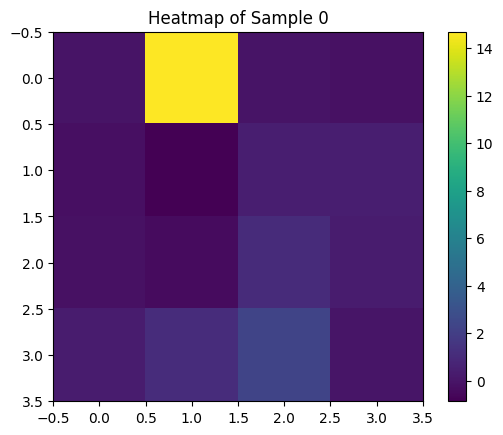

In [35]:
import matplotlib.pyplot as plt
plt.imshow(X[35].squeeze(), cmap='viridis')
plt.colorbar()
plt.title("Heatmap of Sample 0")
plt.show()
